In [1]:
import andes

import ams


In [2]:
import matplotlib
%matplotlib inline

In [3]:
andes.config_logger(stream_level=20)

In [4]:
case1 = ams.get_case('matpower/case39.m')
case2 = "/Users/jinningwang/Documents/work/ams/icebar/case123_tds0.xlsx"
case3 = "/Users/jinningwang/Documents/work/ams/icebar/case123_tds.xlsx"
case4 = "/Users/jinningwang/Documents/work/ams/icebar/case123_tds1.xlsx"

In [5]:
sa = andes.load(case4, setup=True, no_output=True)

Working directory: "/Users/jinningwang/Documents/work/ams/icebar"
> Loaded config from file "/Users/jinningwang/.andes/andes.rc"
> Loaded generated Python code in "/Users/jinningwang/.andes/pycode".
Parsing input file "/Users/jinningwang/Documents/work/ams/icebar/case123_tds1.xlsx"...
Input file parsed in 0.4618 seconds.
System internal structure set up in 0.0285 seconds.


In [6]:
xx = sa.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0049 seconds.
0: |F(x)| = 0.8
1: |F(x)| = 0.0008928026315
2: |F(x)| = 8.227115498e-07
Converged in 3 iterations in 0.0051 seconds.


Check StaticGen voltage and output power

In [7]:
sa.PV.v.v

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
sa.PV.p.v

array([0.08 , 0.08 , 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015,
       0.015])

In [8]:
sa.Slack.v.v

array([1.])

In [20]:
sa.Slack.p.v

array([0.07822082])

Test TDS initialization

In [9]:
xx = sa.TDS.init()

GENROU (vf range) out of typical lower limit.

   idx    | values | limit
----------+--------+------
 GENROU_1 | 0.902  | 1    
 GENROU_2 | 0.740  | 1    


GENROU (xl <= xd2) out of typical upper limit.

   idx    | values | limit
----------+--------+------
 GENROU_1 | 0.100  | 0.026
 GENROU_2 | 0.100  | 0.008
 GENROU_3 | 0.100  | 0.008


Initialization for dynamics completed in 0.0706 seconds.
Initialization was successful.


Check TGOV1N limiter

Lower limit

In [21]:
sa.TGOV1N.LAG_lim.zl

array([0., 0., 0.])

Upper limit

In [22]:
sa.TGOV1N.LAG_lim.zu

array([0., 0., 0.])

Turn off stability check in TDS

In [10]:
sa.TDS.config.criteria = 0

In [11]:
sa.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-20.0 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


  0%|          | 0/100 [00:00<?, ?%/s]

<Toggle Toggler_1>: GENROU.GENROU_2 status changed to 0 at t=5.0 sec.


Simulation to t=20.00 sec completed in 1.5137 seconds.


True

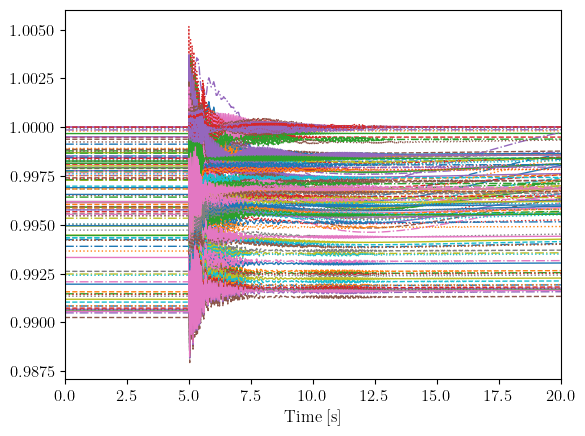

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: xlabel='Time [s]'>)

In [14]:
sa.TDS.plt.plot(sa.Bus.v)

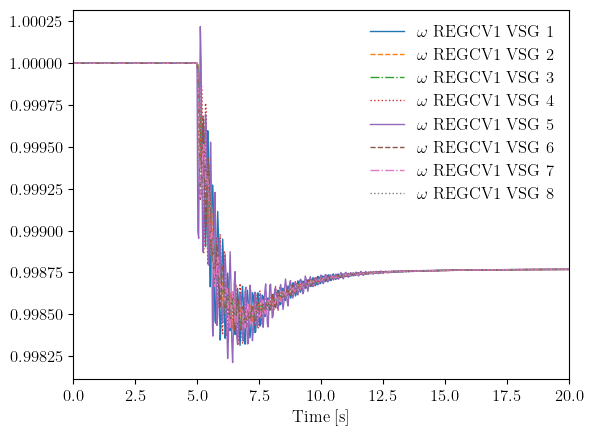

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: xlabel='Time [s]'>)

In [17]:
sa.TDS.plt.plot(sa.REGCV1.omega)

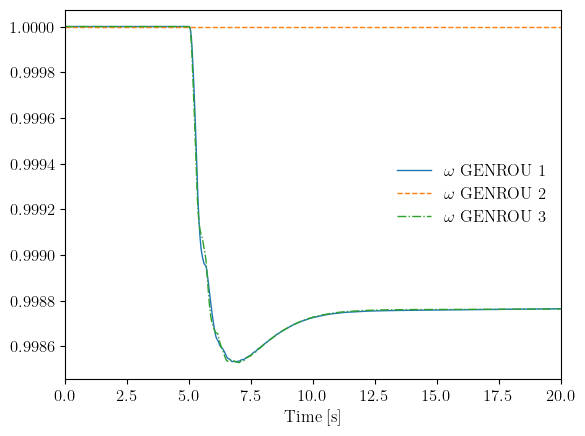

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: xlabel='Time [s]'>)

In [18]:
sa.TDS.plt.plot(sa.GENROU.omega)

In [ ]:
sa.TGOV1N.LAG_lim.upper.v

In [ ]:
sa.TGOV1N.LAG_lim.zu

In [ ]:
sa.GENROU.Pe

In [ ]:
sa.TGOV1N.LAG_lim.zu

In [ ]:
sa.Bus.set(src='a0', attr='v', idx=sa.Bus.idx.v, value=sa.Bus.a.v)
sa.Bus.set(src='v0', attr='v', idx=sa.Bus.idx.v, value=sa.Bus.v.v)

In [ ]:
sa.Bus.v0.v.round(4)

In [ ]:
andes.io.xlsx.write(sa, 'case123_tds_JWang.xlsx', overwrite=True)

In [ ]:
sp = ams.load(case2)

In [ ]:
sp.DCPF.run()